In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#pip install spectrum_utils

In [3]:
#pip install pyteomics

In [4]:
#!pip install rdkit

In [5]:
#!pip install seaborn==0.13.0

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

In [38]:
import logging
from typing import Dict, IO, Iterator, Sequence, Union
from pyteomics import mgf
import pyteomics
from spectrum_utils.spectrum import MsmsSpectrum
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils as su
import numpy as np
from src.load_data import LoadData
from spectrum_utils import plot
from src.preprocessor import Preprocessor
from src.ml_model import MlModel
from src.tanimoto import Tanimoto
from sklearn.model_selection import train_test_split
from src.plotting import Plotting
import pickle
from src.cosine_distance import CosineDistance
from src.stats.stats import Stats

In [8]:
from tqdm import tqdm

In [9]:
from src.spectrum_ext import SpectrumExt

In [10]:
from src.train_utils import TrainUtils
from sklearn.metrics import r2_score

In [11]:
pp =Preprocessor()

## Load data

In [12]:
import dill

# Load the dataset from the pickle file
with open('./dataset_processed.pkl', 'rb') as file:
    dataset = dill.load(file)

# Now you can access the original variables from the dataset dictionary
#all_spectrums_train = dataset['all_spectrums_train']
#all_spectrums_test = dataset['all_spectrums_test']
#molecule_pairs_train = dataset['molecule_pairs_train']
#molecule_pairs_test = dataset['molecule_pairs_test']

In [13]:
dataset.keys()

dict_keys(['all_spectrums_train', 'all_spectrums_test', 'molecule_pairs_train', 'molecule_pairs_val', 'molecule_pairs_test', 'uniformed_molecule_pairs_train', 'uniformed_molecule_pairs_val', 'uniformed_molecule_pairs_test'])

In [14]:
molecule_pairs_test=dataset['molecule_pairs_test']
uniformed_molecule_pairs_test = dataset['uniformed_molecule_pairs_test']

In [15]:
del(dataset)

## Compute similarity metrics

In [16]:
from src.deterministic_similarity import DetSimilarity

In [17]:
import dill

## Make a uniform data

In [18]:
complete_uniformed_molecule_pairs_test =TrainUtils.uniformise(molecule_pairs_test, number_bins=10)

In [62]:
complete_uniformed_molecule_pairs_test = TrainUtils.insert_spectrum_vector_into_molecule_pairs(molecule_pairs_test)

In [63]:
complete_uniformed_molecule_pairs_test = TrainUtils.insert_spectrum_vector_into_molecule_pairs(molecule_pairs_test)

In [64]:
similarities, similarities_tanimoto = DetSimilarity.compute_all_scores(molecule_pairs_test)

3124/3124 [==============================] - 12s 2ms/step


99958it [08:06, 205.36it/s]


C:\Users\ramir\projects\metabolomics_experiments\src\plotting.py:204: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\ramir\projects\metabolomics_experiments\src\plotting.py:243: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\ramir\projects\metabolomics_experiments\src\plotting.py:243: FutureWarning: 

The `scale_hue` parameter has been replaced and will be removed in v0.15.0. Pass `common_norm=True` for the same effect.
  sns.violinplot(


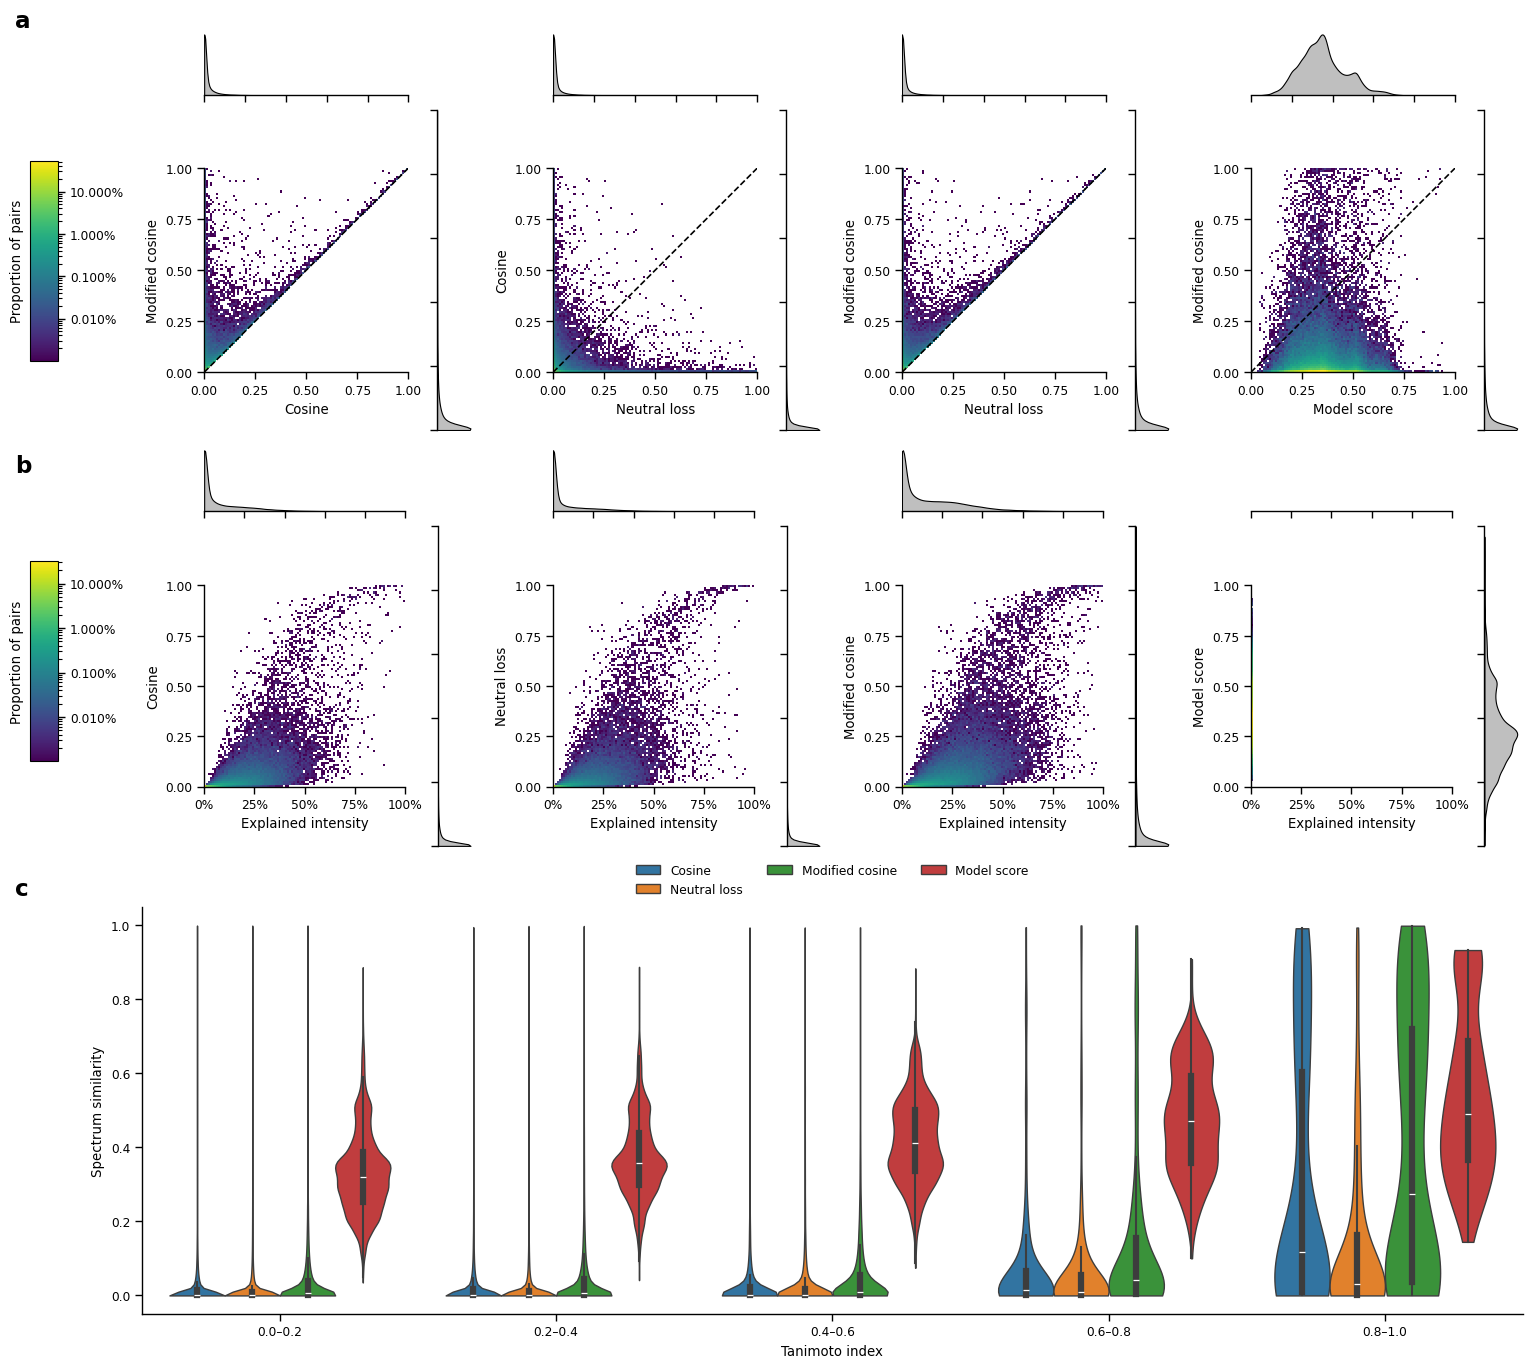

In [78]:
Plotting.plot_similarity_graphs(similarities, similarities_tanimoto)

In [79]:
similarities

,id1,id2,class1,class2,superclass1,superclass2,subclass1,subclass2,smiles1,smiles2,...,cosine,cosine_explained,modified_cosine,modified_cosine_explained,neutral_loss,neutral_loss_explained,model_score,model_score_explained,tanimoto,tanimoto_interval
0,CCMSLIB00010108924,CCMSLIB00000006052,None,None,None,None,None,None,COc1cc(C=C2N=C(O)N(CC(=O)Nc3ccc(C)cc3)C2=O)cc2...,C1=CC(=CC=C1C2=COC3=C(C2=O)C=CC(=C3)O)O,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.299128,0.0,0.236719,0.2–0.4
1,CCMSLIB00000085515,CCMSLIB00000081224,None,None,None,None,None,None,CC1(CC2CC3(C)C1)CC(N)(C2)C3.O[N+](=O)[O-],O=C1C=C2C3C(O3)C(OC)CC42C5=CC6=C(OCO6)C=C5CCN41,...,0.000000,0.000000,0.001124,0.033288,0.001124,0.033288,0.386630,0.0,0.074300,0.0–0.2
2,CCMSLIB00005753510,CCMSLIB00010111501,None,None,None,None,None,None,CNCCCN1C2=C(CCC3=C1C=CC=C3)C=CC=C2,O=C1N=C(O)C(=NNc2cc([N+](=O)[O-])ccc2O)C(O)=N1,...,0.000200,0.010647,0.000200,0.010647,0.000000,0.000000,0.391566,0.0,0.203822,0.2–0.4
3,CCMSLIB00005738222,CCMSLIB00005731010,None,None,None,None,None,None,C(CSC[C@@H](C(=O)O)N)[C@@H](C(=O)O)N,Clc2cc(ccc2Oc1ccc([N+]([O-])=O)c(OCC)c1)C(F)(F)F,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.229045,0.0,0.063003,0.0–0.2
4,CCMSLIB00005884281,CCMSLIB00010109990,None,None,None,None,None,None,O[C@@H]1O[C@H](COP(O)(O)=O)[C@@H](O)[C@H](O)[C...,CS(=O)(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O,...,0.000432,0.008220,0.015939,0.248138,0.015506,0.239918,0.320841,0.0,0.147490,0.0–0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953,CCMSLIB00005761814,CCMSLIB00010011699,None,None,None,None,None,None,CCCCOCCOC(=O)CCCCCCCCC(=O)OCCOCCCC,O=C(NCCCC(O)=O)CCCCCCCCCCCC=CCCCCCCCC,...,0.023333,0.181585,0.038111,0.245983,0.015295,0.066770,0.351583,0.0,0.217778,0.2–0.4
99954,CCMSLIB00010125286,CCMSLIB00011436575,None,None,None,None,None,None,CCCCOC(=O)c1cc(O)nc(O)n1,O=C(NCC(O)=O)CCC=CCC=CCC=CCC=CCC=CCC=CCC,...,0.134282,0.216666,0.134810,0.217021,0.001759,0.024267,0.245003,0.0,0.079208,0.0–0.2
99955,CCMSLIB00005763678,CCMSLIB00011432540,None,None,None,None,None,None,CC1=CC2=C3N(CC2)C(=O)[C@H](NC(=O)C2=CC=NC=C2)N...,C[C@H](CCC(N[C@H](C(O)=O)CCCCN)=O)[C@H]1CC[C@@...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.309994,0.0,0.190089,0.0–0.2
99956,CCMSLIB00005750121,CCMSLIB00003139332,None,None,None,None,None,None,C[C@]12CC=C3[C@@H](CCC4=C3CCC5(C4)OCCO5)[C@@H]...,C1CN(CCN1CCCN2C(=O)N3C=CC=CC3=N2)C4=CC(=CC=C4)Cl,...,0.000157,0.007675,0.000157,0.007675,0.000000,0.000000,0.353157,0.0,0.210994,0.2–0.4


In [80]:
model_score = similarities['model_score'].values
tanimoto = similarities['tanimoto'].values
mod_cos = similarities['modified_cosine'].values

In [81]:
# what if we combine both metrics?
combined_model_mod_cos = mod_cos*model_score

In [104]:
p_model, r_model = Stats.calculate_roc_curve(model_score, tanimoto)
p_mod_cos, r_mod_cos = Stats.calculate_roc_curve(mod_cos, tanimoto)
p_comb, r_comb=Stats.calculate_roc_curve(combined_model_mod_cos, tanimoto)

(array([48., 15.,  8.,  3.,  7.,  9., 11., 10.,  9., 20.]),
 array([0.        , 0.09992687, 0.19985373, 0.2997806 , 0.39970746,
        0.49963433, 0.59956119, 0.69948806, 0.79941492, 0.89934179,
        0.99926865]),
 <BarContainer object of 10 artists>)

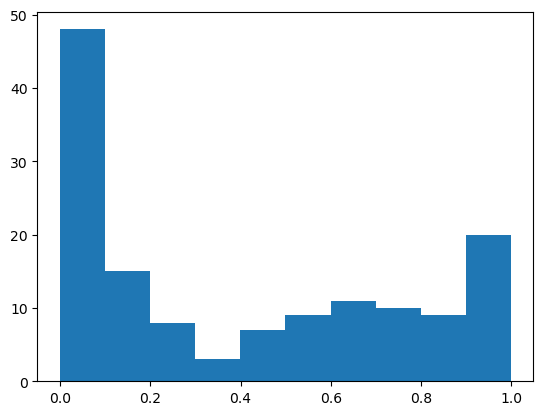

In [105]:
plt.hist(mod_cos[tanimoto>0.8])

In [106]:
high_tanimoto = np.sum([tanimoto>0.8])
true_positive =np.sum([mod_cos[tanimoto>0.8]>0.6])

In [107]:
true_positive/high_tanimoto

0.35714285714285715

In [108]:
true_positive/np.sum([mod_cos>0.6])

0.04336513443191674

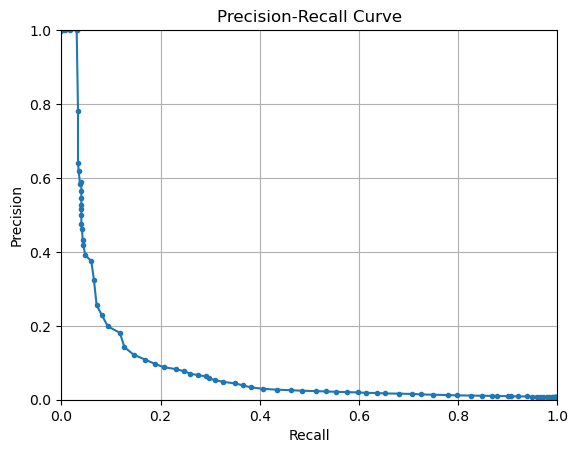

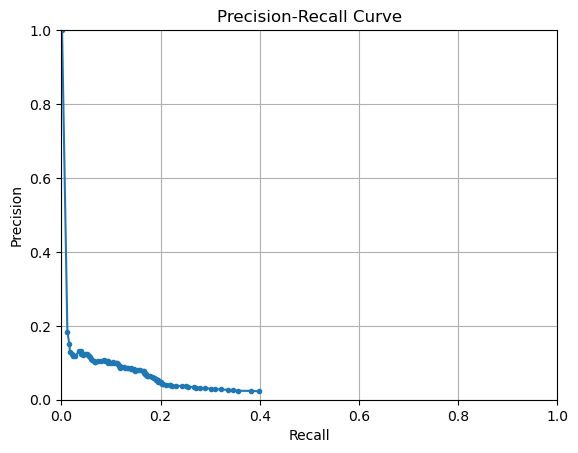

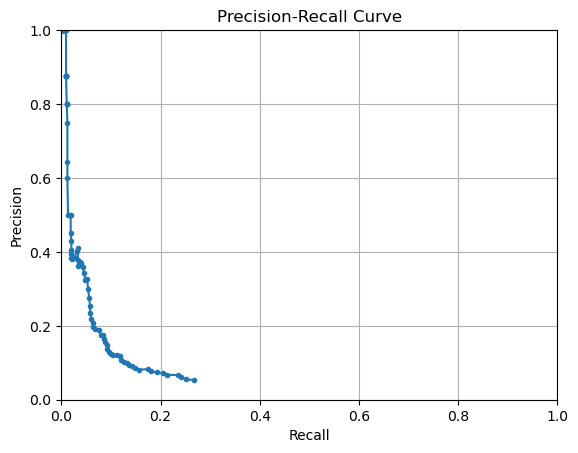

In [110]:
Plotting.plot_roc_curve(r_model, p_model)
Plotting.plot_roc_curve(r_mod_cos, p_mod_cos)
Plotting.plot_roc_curve(r_comb, p_comb)